In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
from astropy.io import fits
from astropy import table
from astLib import astWCS
import math
from nemo import completeness, MockSurvey

import sys
sys.path.append('../')
import nemo_mocks
import imp
imp.reload(nemo_mocks)

<module 'nemo_mocks' from '/Users/eunseonglee/SOLikeT/soliket/clusters/notebooks/../nemo_mocks.py'>

In [2]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.261, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.,
    'C0': 2.

}

path2data ='/Users/eunseonglee/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'method': 'injection',
        'whichQ': 'injection',
        'resolution': 'downsample',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': False,
    },
    'binning': {
        'z': {
            'zmin': 0.,
            'zmax': 2.,
            'dz': 0.1
        },
        'q': {
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            'Mmin': 5e13,
            'Mmax': 1e16,
            'dlogM': 0.01
        }
    }
    }},
    'theory': {'soliket.clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Initializing clusters.py Binned Clusters
Running injection based selection function.
Using averaged Q from source injection.
Running completeness with down-sampled selection function inputs.
Total number of clusters in catalogue = 5738.
SNR cut = 5.0.
Number of clusters above the SNR cut = 3169.
The lowest redshift = 0.01
The highest redshift = 1.96
The lowest SNR = 5.00.
The highest SNR = 51.99.
Reading in full Q function.
Initial number of tiles = 280.
Number of tiles after removing the tiles with zero area = 264. 
Reading in full RMS table.
Number of RMS values = 40672.
Down-sampling RMS and Q function using 50 bins.
Number of down-sampled RMS = 50.
Number of down-sampled Q funcs = 50.
/Users/eunseonglee/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
Entire survey area = 13631.324739140997 deg2.
Number of redshift bins = 20.
Number of SNR bins = 6.
Number of redshift poi

 ::: 2D ln likelihood =  153.01177780782223


array([-153.01177781])

In [3]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [4]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

 Total predicted 2D N = 3201.2172766399517
Number of clusters in redshift bin 0: 96.77418063341094.
Number of clusters in redshift bin 1: 358.86003198943274.
Number of clusters in redshift bin 2: 472.2329584094609.
Number of clusters in redshift bin 3: 486.51160696245086.
Number of clusters in redshift bin 4: 435.9029472638175.
Number of clusters in redshift bin 5: 361.9233039390036.
Number of clusters in redshift bin 6: 285.92270392094196.
Number of clusters in redshift bin 7: 215.16277694057007.
Number of clusters in redshift bin 8: 157.33595388567755.
Number of clusters in redshift bin 9: 110.92709271728684.
Number of clusters in redshift bin 10: 75.30174628331966.
Number of clusters in redshift bin 11: 50.168868495127114.
Number of clusters in redshift bin 12: 33.34705053250085.
Number of clusters in redshift bin 13: 22.19467729924078.
Number of clusters in redshift bin 14: 14.594384776440062.
Number of clusters in redshift bin 15: 9.512987878857173.
Number of clusters in redshift 

In [5]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [6]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']

zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [7]:
mockconfig_pred = {
    'predSNRCut': 5,
    'path2truthcat': '/Users/eunseonglee/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'injection',
    'QSource': 'injection'
}

In [8]:
nemoNz = nemo_mocks.get_nemo_pred(mockconfig_pred, zbins)

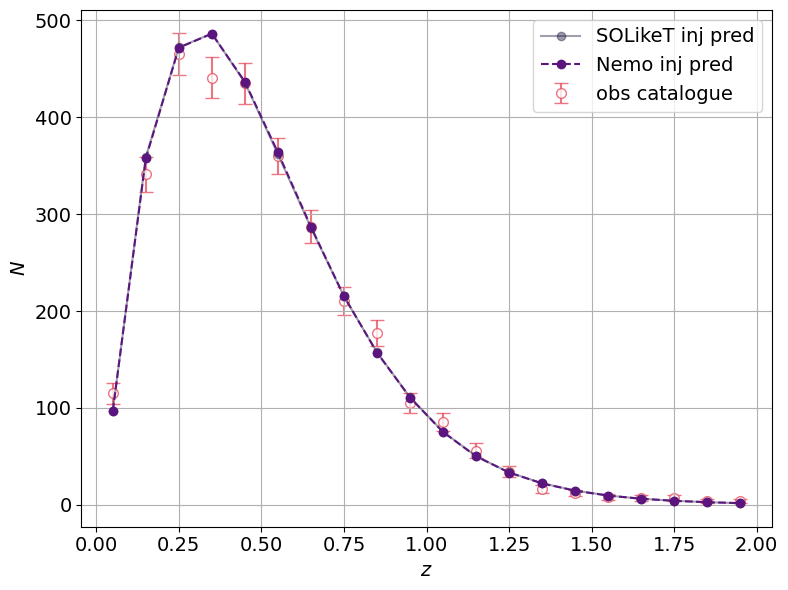

In [28]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], marker='o', alpha=0.4, label='SOLikeT inj pred')
plt.plot(z, nemoNz, color=color_list[3], marker='o', linestyle='--', alpha=1, label='Nemo inj pred')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[9], fmt='o', ms=7, mfc='white', zorder=0, capsize=5, capthick=1, ls='none', alpha=0.8, label='obs catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, 2.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_inj.pdf')
plt.show()

In [10]:
obs = catNz
exp = Nz

chi2 = (np.power(obs - exp, 2) / exp).sum()

print("chi2 : ", chi2)
print("dof : ", len(exp))

chi2 :  22.575206910641096
dof :  20


In [11]:
obs = catNq
exp = Nq

chi2 = (np.power(obs - exp, 2) / exp).sum()

print("chi2 : ", chi2)
print("dof : ", len(exp))

chi2 :  2.4761471351259305
dof :  6


In [12]:
len(catNz)

20

In [13]:
nemoNz.sum()

3202.339645878253

In [14]:
Nz.sum()

3201.217276639952

In [15]:
catNz.sum()

3169.0

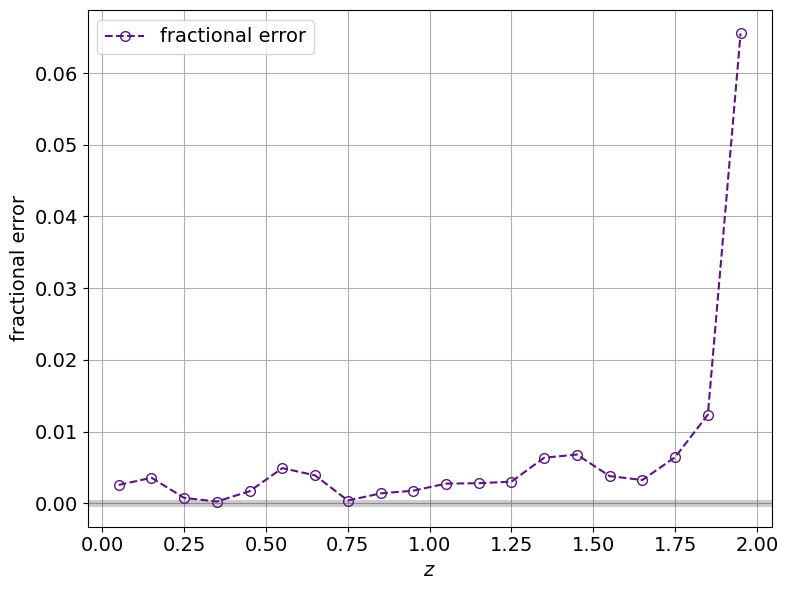

In [16]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, np.abs(Nz/nemoNz-1), color=color_list[3], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
#plt.fill_between(z, -np.sqrt(catNz)/catNz, np.sqrt(catNz)/catNz, alpha=0.2, color='gray', label='$\pm\sqrt{N_{obs}}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_inj_frac.pdf')
plt.show()

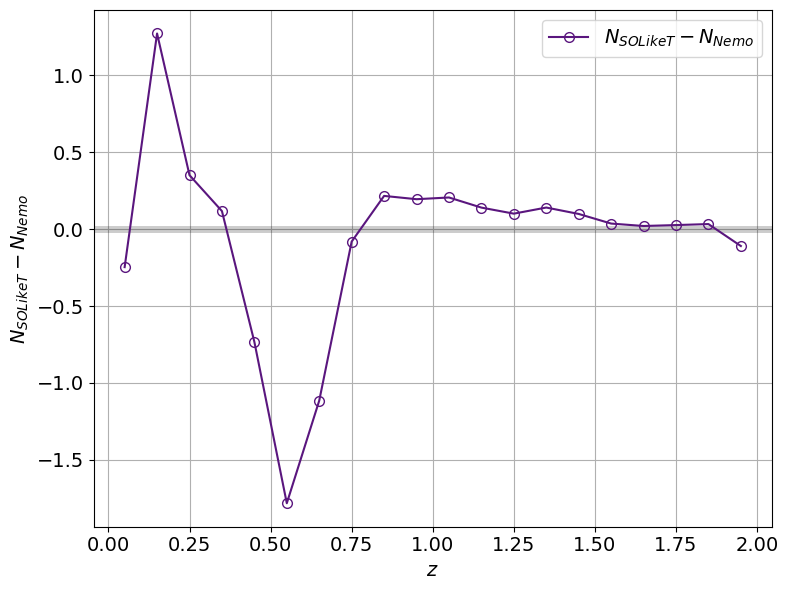

In [17]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, Nz-nemoNz, color=color_list[3], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{Nemo}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{Nemo}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_inj_diff.pdf')
plt.show()

In [18]:
Nz-nemoNz

array([-0.24734182,  1.27135587,  0.35030915,  0.11697549, -0.73329531,
       -1.78200942, -1.11513709, -0.08128759,  0.21560377,  0.19418965,
        0.20537936,  0.13966325,  0.10029325,  0.1400242 ,  0.09843118,
        0.03589748,  0.02008318,  0.02607307,  0.03254172, -0.11011861])

In [19]:
nemoNz

array([ 97.02152245, 357.58867612, 471.88264925, 486.39463147,
       436.63624258, 363.70531336, 287.03784101, 215.24406453,
       157.12035012, 110.73290307,  75.09636693,  50.02920525,
        33.24675729,  22.0546531 ,  14.49595359,   9.4770904 ,
         6.19937014,   4.05907273,   2.63655301,   1.68042947])

In [20]:
Nz

array([ 96.77418063, 358.86003199, 472.23295841, 486.51160696,
       435.90294726, 361.92330394, 285.92270392, 215.16277694,
       157.33595389, 110.92709272,  75.30174628,  50.1688685 ,
        33.34705053,  22.1946773 ,  14.59438478,   9.51298788,
         6.21945333,   4.08514581,   2.66909473,   1.57031085])

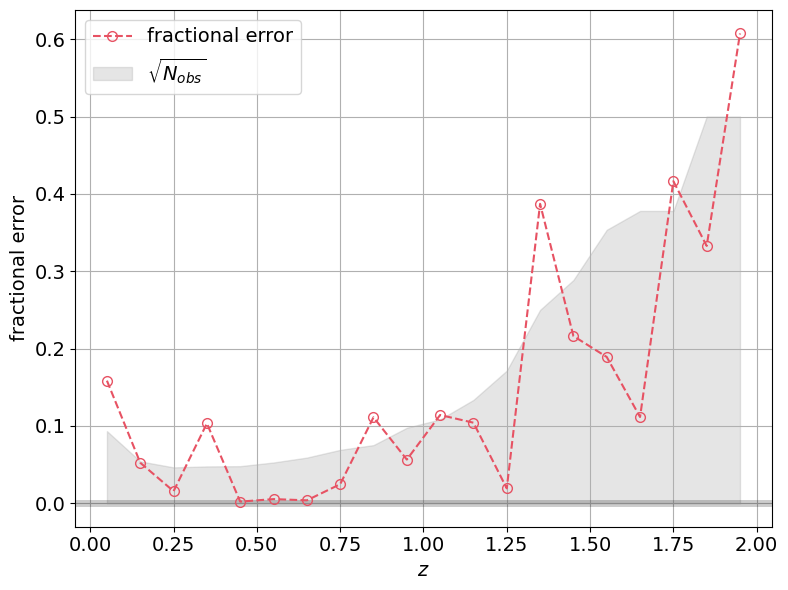

In [21]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, np.abs(Nz/catNz-1), color=color_list[9], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
plt.fill_between(z, 0, np.sqrt(catNz)/catNz, alpha=0.2, color='gray', label='$\sqrt{N_{obs}}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_inj_obs_frac.pdf')
plt.show()

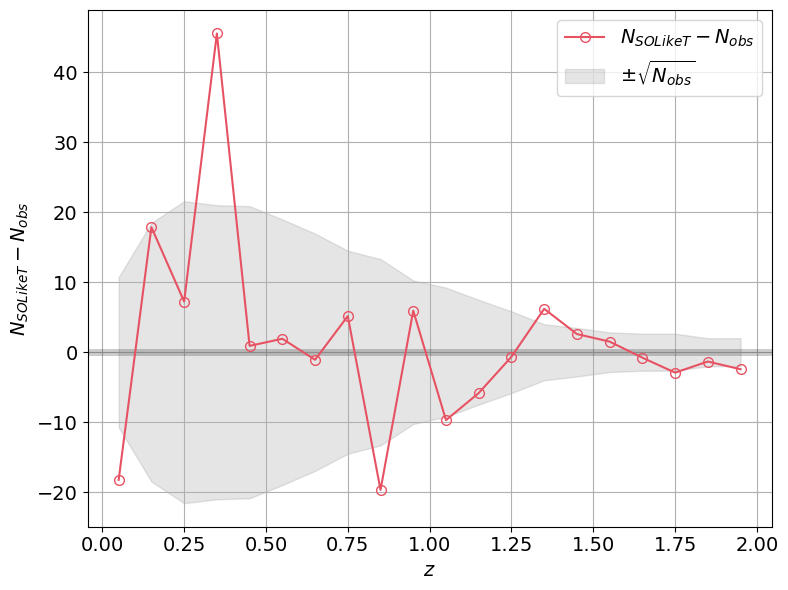

In [22]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(z, Nz-catNz, color=color_list[9], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{obs}$')
plt.fill_between(z, -np.sqrt(catNz), np.sqrt(catNz), alpha=0.2, color='gray', label='$\pm\sqrt{N_{obs}}$')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{obs}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nz_inj_obs_diff.pdf')
plt.show()

In [23]:
len(catNz)

20

In [24]:
catNz

array([115., 341., 465., 441., 435., 360., 287., 210., 177., 105.,  85.,
        56.,  34.,  16.,  12.,   8.,   7.,   7.,   4.,   4.])

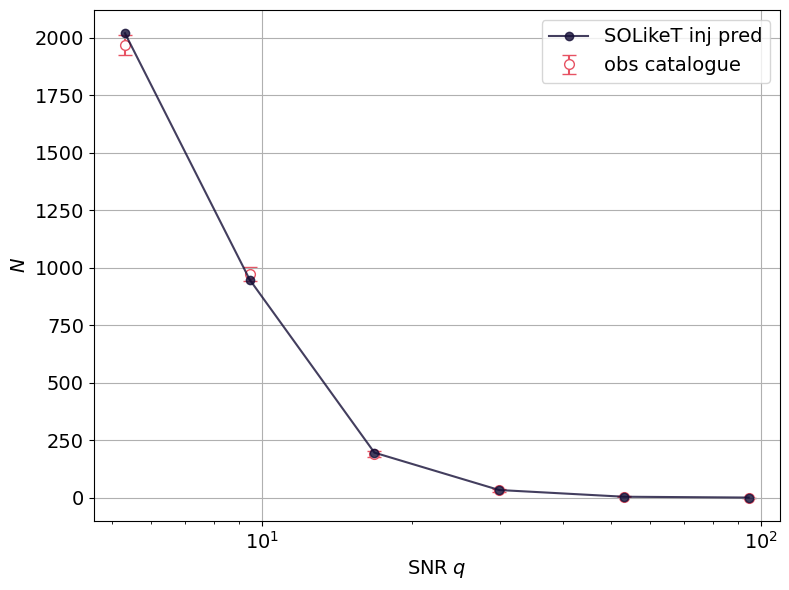

In [25]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], marker='o', alpha=0.8, label='SOLikeT inj pred')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[9], fmt='o', ms=7, mfc='white', zorder=0, capsize=5, capthick=1, ls='none', alpha=1, label='obs catalogue')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, 2.0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_inj.pdf')
plt.show()

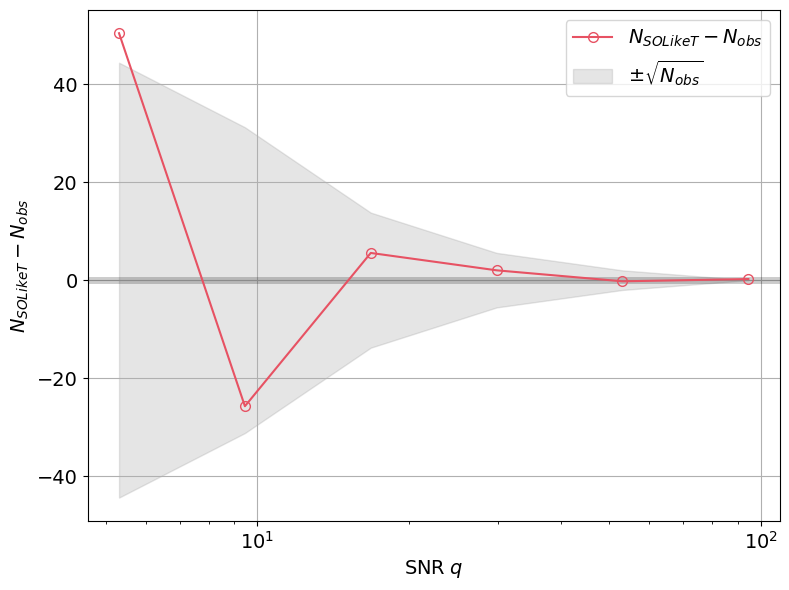

In [26]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(q, Nq-catNq, color=color_list[9], marker='o', ls='-', mfc='none', ms=7, label='$N_{SOLikeT}-N_{obs}$')
plt.fill_between(q, -np.sqrt(catNq), np.sqrt(catNq), alpha=0.2, color='gray', label='$\pm\sqrt{N_{obs}}$')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('$N_{SOLikeT}-N_{obs}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_inj_obs_diff.pdf')
plt.show()

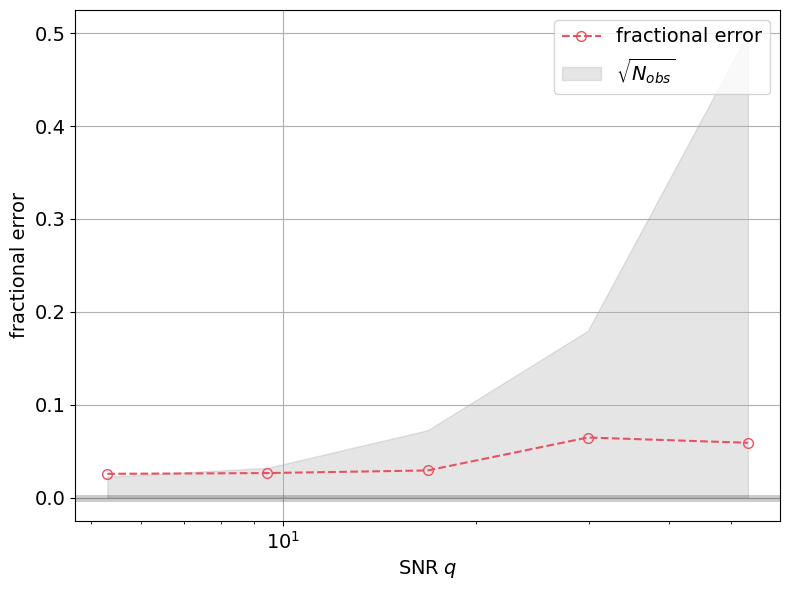

In [27]:
plt.figure(figsize=(8,6))
plt.axhline(y=0, lw=5, c='k', alpha=0.2)
plt.plot(q, np.abs(Nq/catNq-1), color=color_list[9], marker='o', ls='--', mfc='none', ms=7, label='fractional error')
plt.fill_between(q, 0, np.sqrt(catNq)/catNq, alpha=0.2, color='gray', label='$\sqrt{N_{obs}}$')
plt.xlabel('SNR $q$', fontsize=14)
plt.ylabel('fractional error', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
#plt.xlim(0, 2.0)
plt.grid()
plt.tight_layout()
plt.savefig('0Nq_inj_obs_frac.pdf')
plt.show()